##### Problema de Negócio:

Usando dados históricos das vendas ao longo de 2023 seria possível prever o total de vendas em Janeiro/2024?

In [1]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [3]:
# Ultimos registros
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


### Pré-Processamento dos dados

In [4]:
# Valor mínimo da coluna data
df['Data'].min()

'2023-01-01'

In [5]:
# Valor máximo da coluna data
df['Data'].max()

'2023-12-31'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [7]:
# Converte a coluna de data no tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [13]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')

serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

### Análise Exploratória

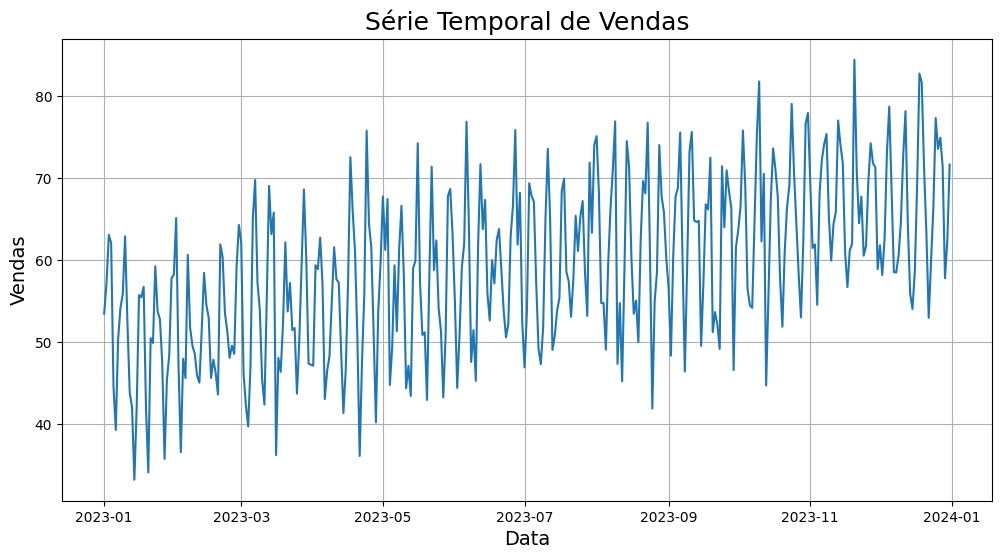

In [19]:
# Cria o gráfico da série temporal
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Vendas', fontsize = 14)
plt.title('Série Temporal de Vendas', fontsize = 18)
plt.grid(True)
plt.show()

### Suavização Exponencial

In [20]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [ ]:
# Treinamento do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

In [22]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

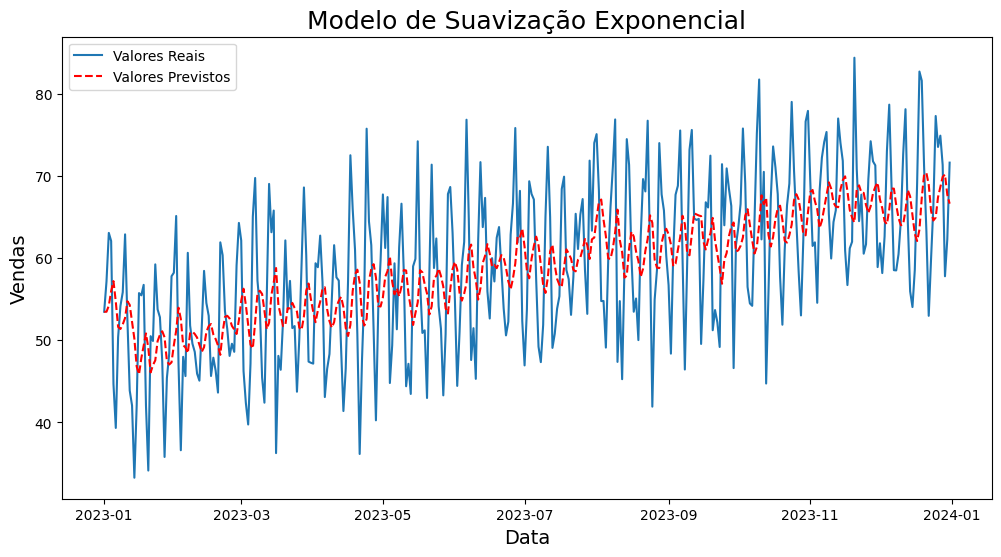

In [25]:
# Plot
plt.figure(figsize = (12, 6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label = 'Valores Previstos', linestyle = '--', color = 'red')
plt.xlabel('Data', fontsize = 14)
plt.ylabel('Vendas', fontsize = 14)
plt.title('Modelo de Suavização Exponencial', fontsize = 18)
plt.legend()
plt.show()

### Deploy e Previsão com o Modelo Treinado

In [35]:
# Fazendo previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [36]:
print('Previsão do Total de Vendas Para Janeiro/2024:', round(list(previsoes)[0], 4))

Previsão do Total de Vendas Para Janeiro/2024: 67.6499
